In [19]:
import matplotlib.pyplot as plt
import random


def euclidean_distance(point1, point2):
    distance = 0
    for a, b in zip(point1, point2):
        distance += (b-a)**2
    return distance ** 2 

class KMeans:

    def __init__(self, nb_clusters=5, max_iters=100, plot_steps=False):
        self.nb_clusters = nb_clusters
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        #store the sample indices for each cluster
        self.clusters = [[] for _ in range(self.nb_clusters)]

        #store the centroids(mean vector) for each cluster
        self.centroids = []

    def predict(self, X):
        self.X = X
        #storing number of samples and each features of the dataset
        self.n_samples, self.n_features = X.shape

        #Initialize the centroids
            ## Firstly, we generate randomly the indices between n_samples indices
        random_sample_indices = random.sample(range(self.n_samples), self.nb_clusters)
            ## Secondly, we initialize the centroids
        self.centroids = [self.X[indice] for indice in random_sample_indices]

        #Optimization clusters
        for _ in range(self.max_iters):
            #assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)

            if self.plot_steps: 
                self.plot()

            #calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)#here we update centroids through this function

            if self._is_converged(centroids_old, self.centroids):
                break
            if self.plot_steps: 
                self.plot()

        #Classify sample as the index of their clusters
        return self._get_cluster_labels(self.clusters)

    #This function allows to create clusters so to regroup sample around the closest centroid
    def _create_clusters(self, centroids):
        #assign the sample to the closest centroids 
        clusters = [[] for _ in range(self.nb_clusters)]
        for idx, sample in enumerate(self.X):
            ## calculate distance between each sample of dataset and each centroid and we retrieve the closest centroid of each sample
            centroid_idx = self._closest_centroid(sample, centroids) #retrieve the closest centroid indice 
            clusters[centroid_idx].append(idx) #we append indice of the sample in the corresponding cluster
        return clusters
    
    def _closest_centroid(self, sample, centroids):
        #distance of the currrent sample to each centroid
        distances = [euclidean_distance(sample, centroid) for centroid in centroids]
        closest_idx = distances.index(min(distances))#return index of the most minumum distance
        return closest_idx

    #here we apply the barycenter technique to determine the center of the clusters of the old centroid and we initialize the new_centroid with this function
    def _get_centroids(self, clusters):
        #assign the mean value of the cluster to centroids
        centroids = [[0] * self.n_features for _ in range(self.nb_clusters)]
        for cluster_idx, cluster in enumerate(clusters):
            centroids[cluster_idx] = self._cluster_mean(cluster)# retrieve samples in self.X of a cluster and calculate the mean of each feature
        return centroids
    
        #this function allows to calculate the mean of a cluster
    def _cluster_mean(self, cluster):
        nb_features = len(self.X[0])
        nb_points = len(cluster)
        sum_dimension = [0] * nb_features

        for idx_feature in range(nb_features):
            for index, each_cluster_idx_point in enumerate(cluster):
                sum_dimension[idx_feature] += self.X[each_cluster_idx_point][idx_feature]
        
        cluster_mean = [sum_dimension [i]/ nb_points for i in range(nb_features)]

        return cluster_mean




    def _is_converged(self, centroids_old, new_centroids):
        #chack the distance between old and new centroids, for all centroids
        distances = [euclidean_distance(centroids_old[i], new_centroids[i]) for i in range(self.nb_clusters)] 
        return sum(distances) == 0

    def _get_cluster_labels(self, clusters):
        #each sample will get he label of the cluster it was assigned to 
        labels = [None] * self.n_samples
        # we retrieve from each cluster his indice and itself
        for cluster_idx, cluster in enumerate(clusters):
            # we retrieve each sample indice of the cluster and we store his indice in the label
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx

        return labels

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)
        
        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.show()


    


(500, 2)
3


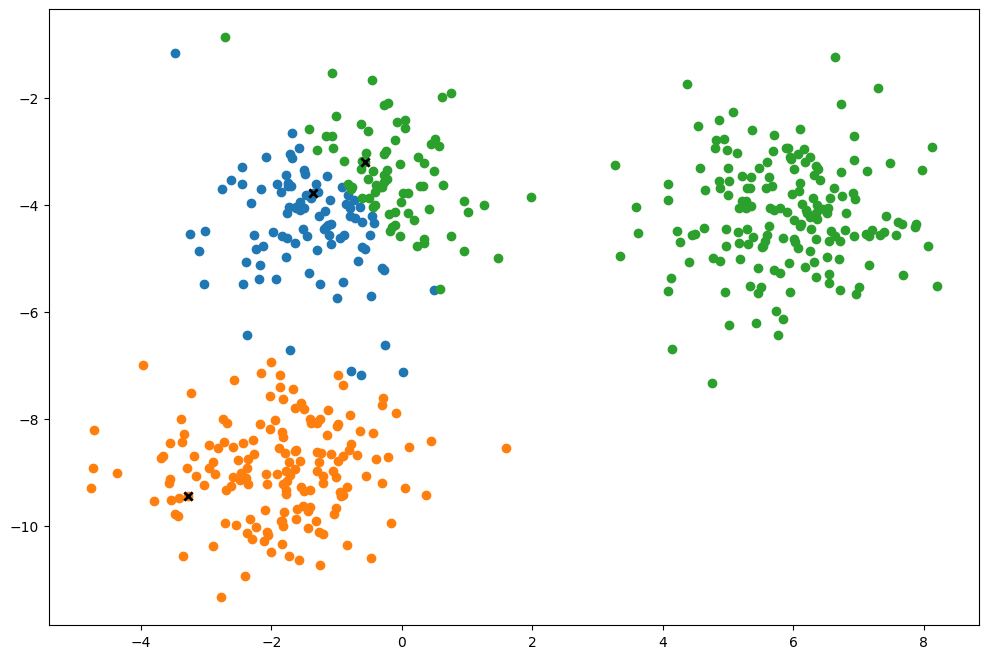

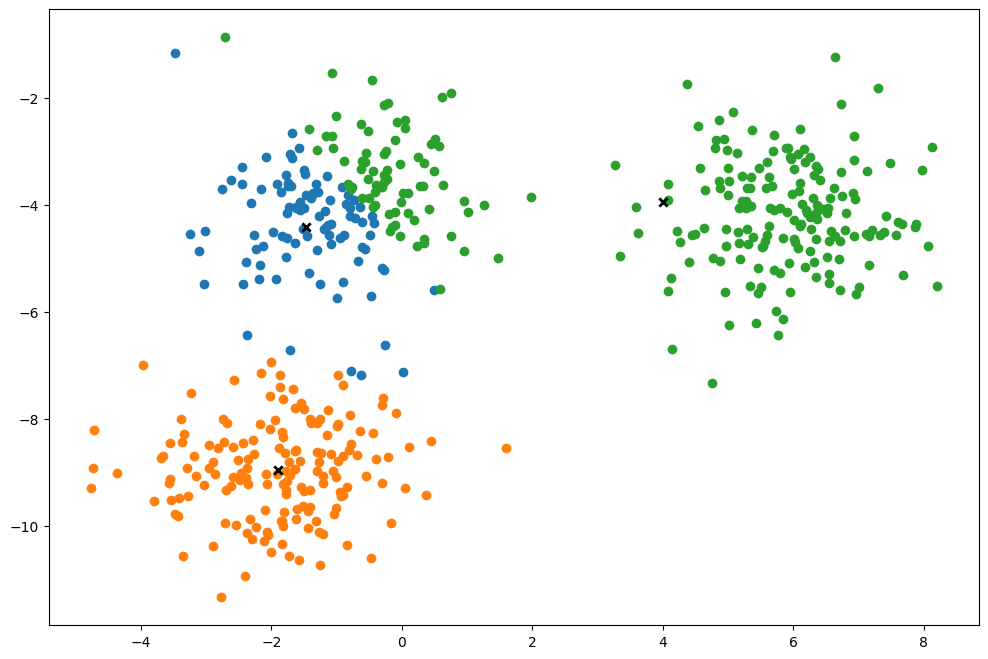

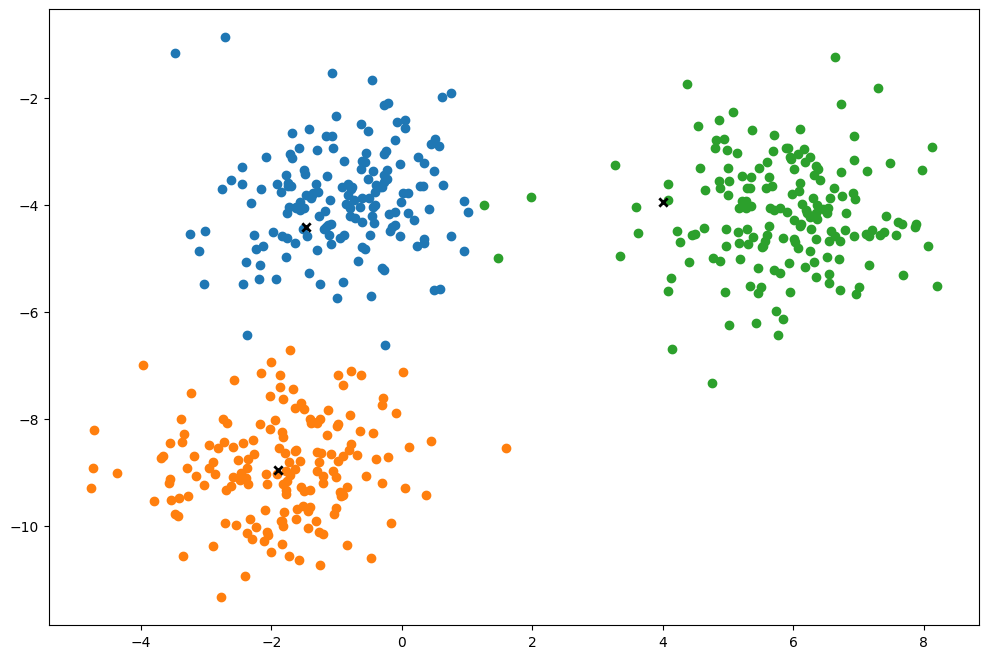

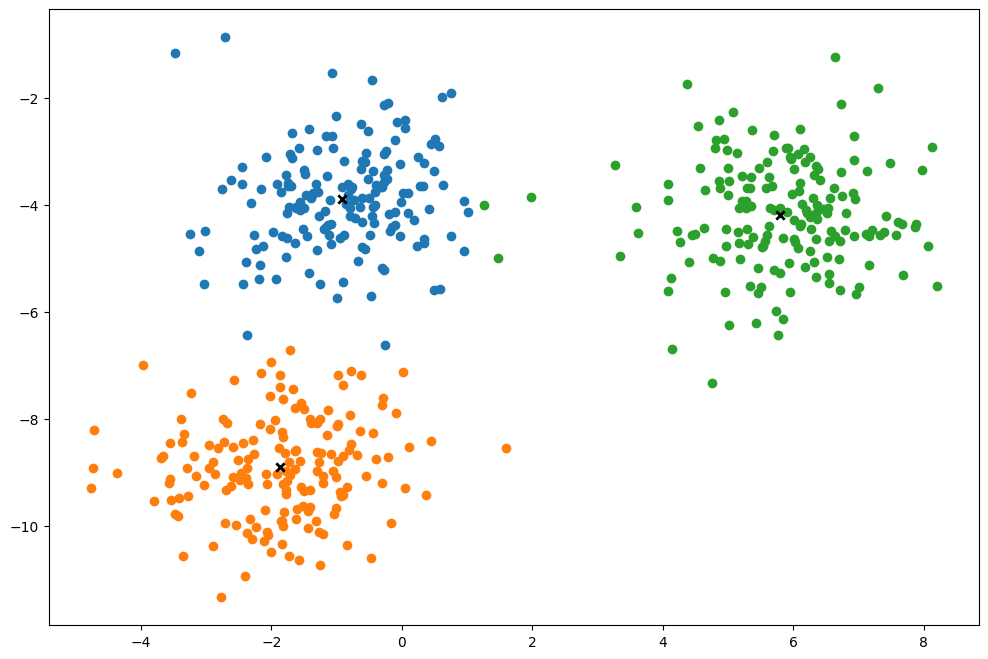

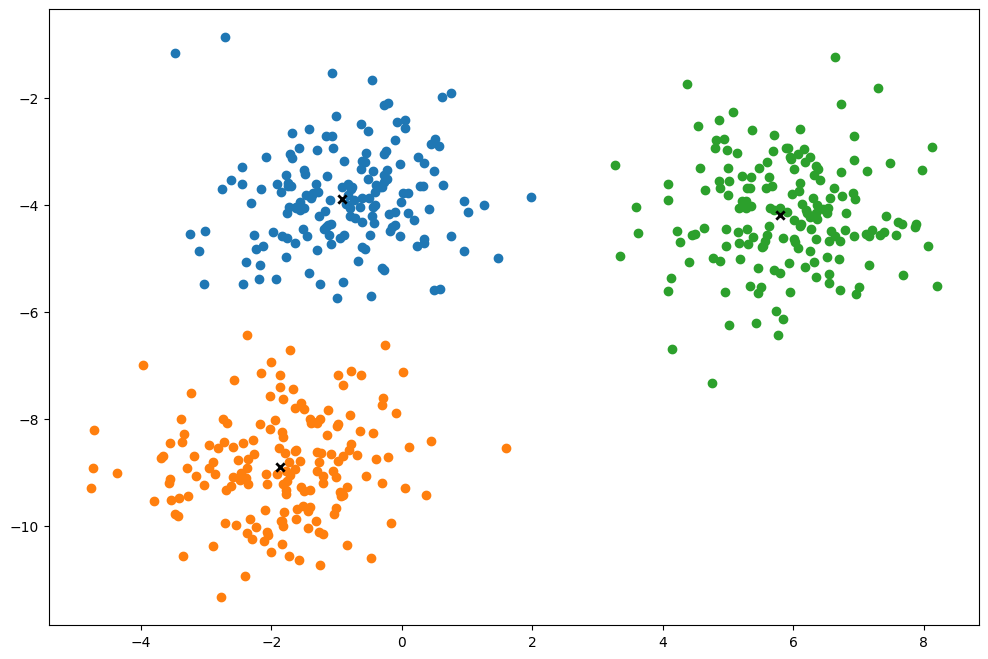

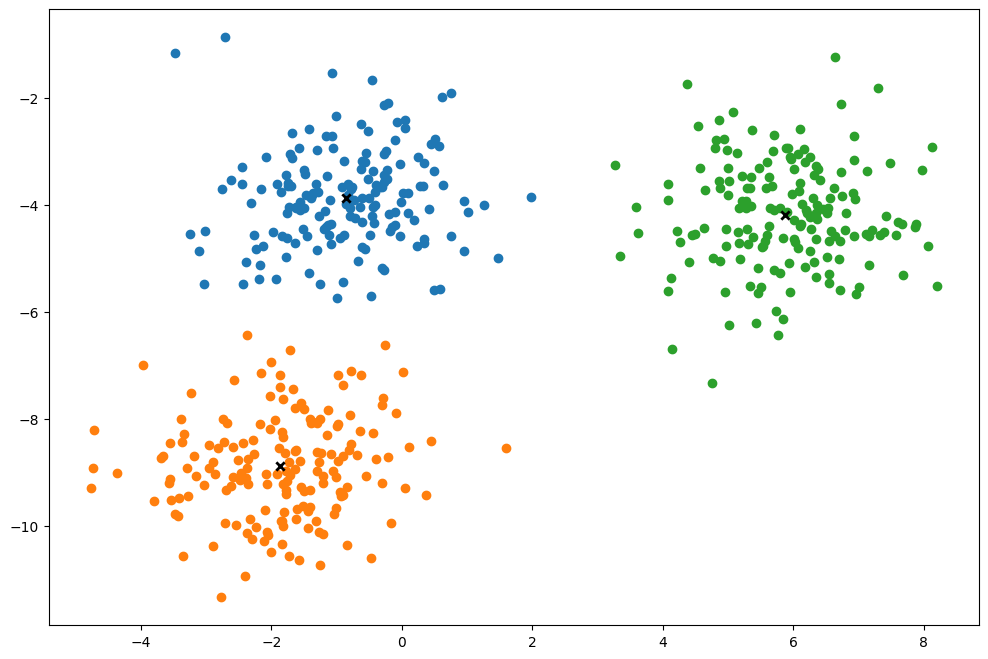

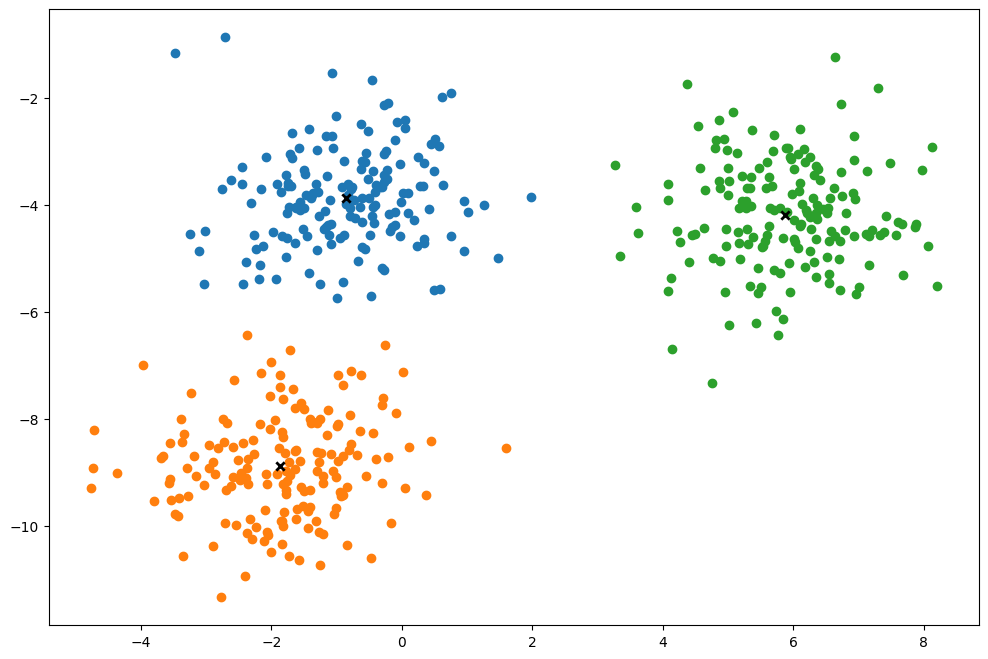

[1. 2. 0. 0. 2. 2. 1. 1. 1. 1. 2. 2. 0. 1. 2. 0. 2. 2. 1. 0. 1. 2. 2. 2.
 1. 1. 1. 2. 1. 0. 2. 1. 2. 0. 0. 1. 2. 0. 1. 1. 2. 1. 2. 2. 0. 0. 0. 0.
 2. 2. 0. 0. 1. 0. 0. 2. 0. 2. 0. 2. 1. 0. 2. 1. 0. 1. 1. 2. 2. 0. 0. 1.
 2. 0. 1. 2. 2. 1. 2. 0. 1. 0. 0. 2. 0. 2. 1. 0. 0. 1. 1. 1. 2. 1. 0. 2.
 0. 1. 0. 2. 0. 2. 0. 2. 2. 1. 2. 2. 2. 0. 0. 0. 2. 2. 2. 1. 2. 1. 1. 2.
 0. 0. 2. 0. 2. 1. 0. 2. 2. 2. 2. 0. 0. 0. 2. 1. 2. 0. 2. 2. 1. 0. 2. 1.
 1. 2. 1. 1. 1. 1. 2. 2. 2. 2. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 2. 1. 0. 0.
 2. 2. 1. 0. 2. 0. 0. 0. 0. 0. 0. 1. 2. 0. 2. 1. 2. 1. 0. 1. 2. 2. 0. 0.
 1. 2. 0. 0. 1. 0. 0. 1. 1. 0. 2. 2. 2. 1. 1. 1. 0. 2. 2. 2. 2. 1. 0. 1.
 2. 0. 1. 1. 0. 2. 0. 0. 0. 2. 2. 0. 0. 1. 0. 2. 1. 2. 0. 0. 2. 2. 1. 1.
 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 2. 2. 0. 0. 1. 0. 2. 2. 2. 2. 2. 2.
 1. 2. 0. 0. 1. 2. 1. 1. 1. 0. 1. 0. 2. 0. 2. 0. 2. 1. 1. 0. 0. 0. 2. 1.
 1. 0. 0. 1. 2. 2. 1. 1. 1. 0. 2. 2. 0. 0. 2. 0. 1. 2. 2. 0. 1. 1. 2. 2.
 2. 1. 2. 0. 0. 2. 1. 1. 2. 1. 1. 1. 1. 2. 1. 0. 2.

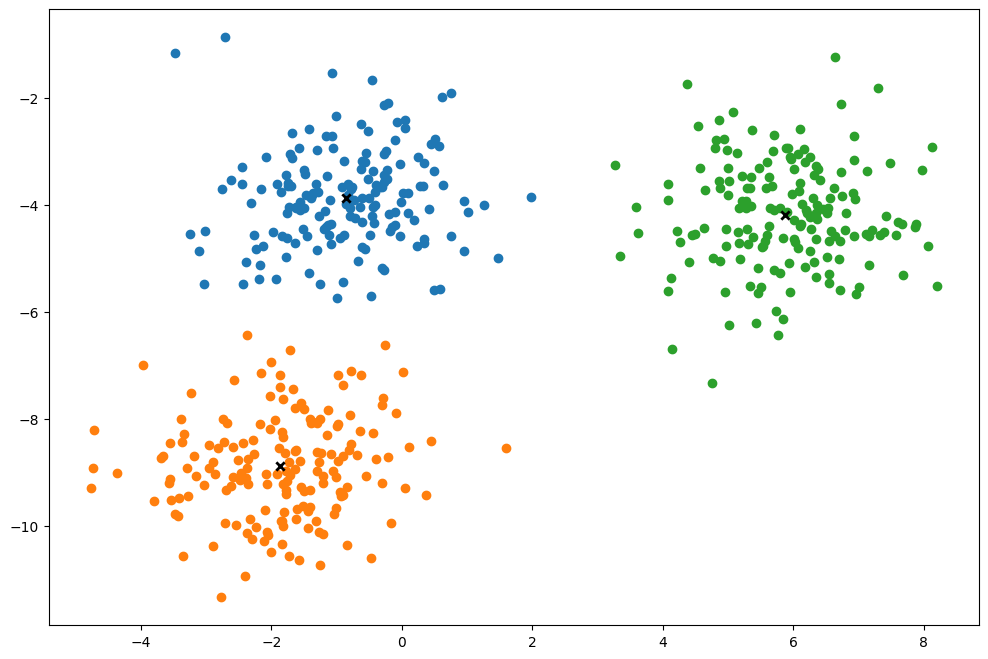

In [20]:
#Testing the model
if __name__ == "__main__":

    random.seed(40)
    from sklearn.datasets import make_blobs

    X, y = make_blobs(
        centers= 3, n_samples=500, n_features=2, shuffle=True, random_state=40
    )
    print(X.shape)

    clusters = len(set(y))
    print(clusters)

    k = KMeans(nb_clusters=clusters, max_iters=150, plot_steps=True)
    y_pred = k.predict(X)
    print(y_pred)

    k.plot()

In [ ]:
#Testing the model on another dataset
access_path

In [4]:
#Testing
# Initialize centroids as a list of lists
centroids = [[0] *10 for _ in range(5)]
centroids


[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [23]:
import numpy as np

labels = np.full(5, None)
labels = [None] * 5
labels

[None, None, None, None, None]